In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [16]:
pwd


'C:\\Users\\pavankalyankanakam'

In [17]:
cd D:\

D:\


In [18]:
pwd


'D:\\'

In [57]:
df=pd.read_csv("Admission_Predict.csv")
df=df.rename(columns = {'Chance of Admit ':'Chance_of_Admit'})
df.head()


Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance_of_Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [43]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

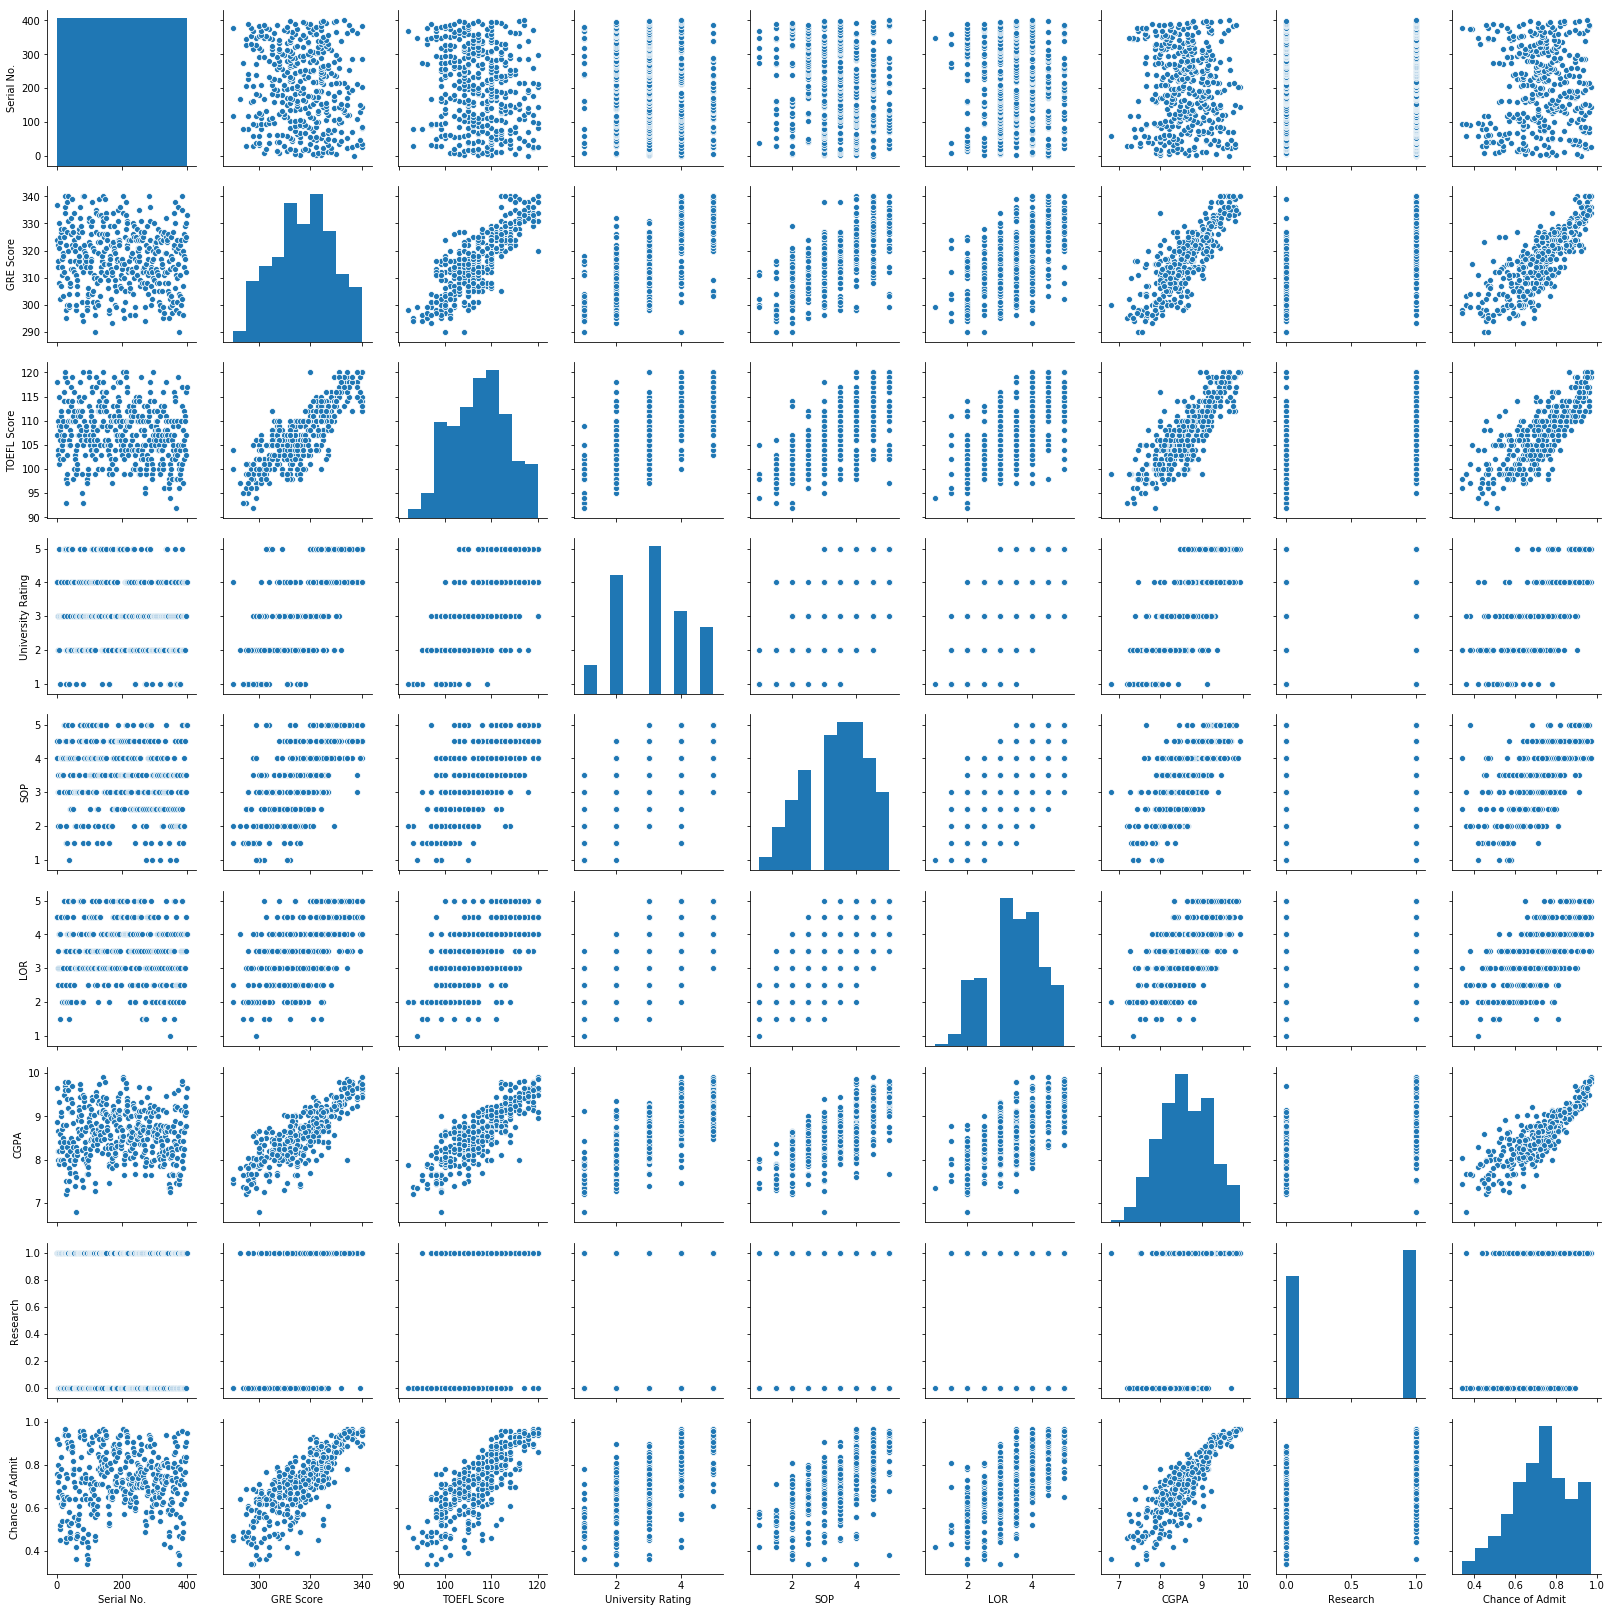

In [44]:
sns.pairplot(df)

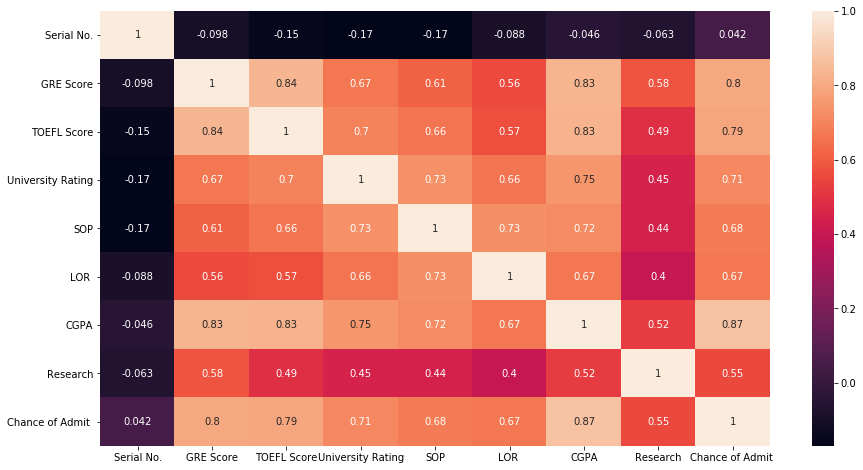

In [45]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

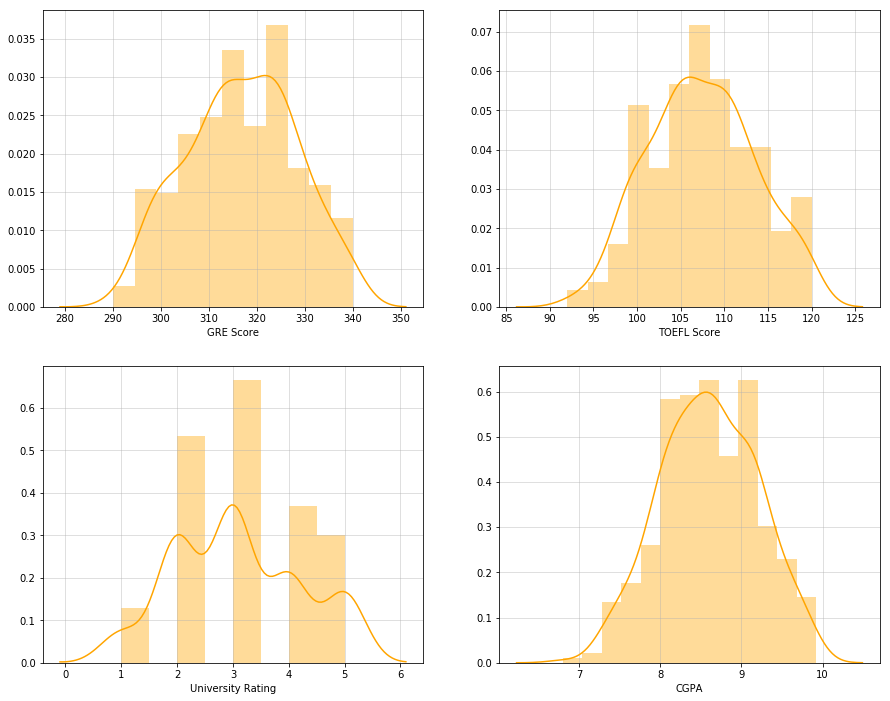

In [46]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.distplot(df['GRE Score'], color='Orange')
plt.grid(alpha=0.5)

plt.subplot(2,2,2)
sns.distplot(df['TOEFL Score'], color='Orange')
plt.grid(alpha=0.5)

plt.subplot(2,2,3)
sns.distplot(df['University Rating'], color='Orange')
plt.grid(alpha=0.5)

plt.subplot(2,2,4)
sns.distplot(df['CGPA'], color='Orange')
plt.grid(alpha=0.5)

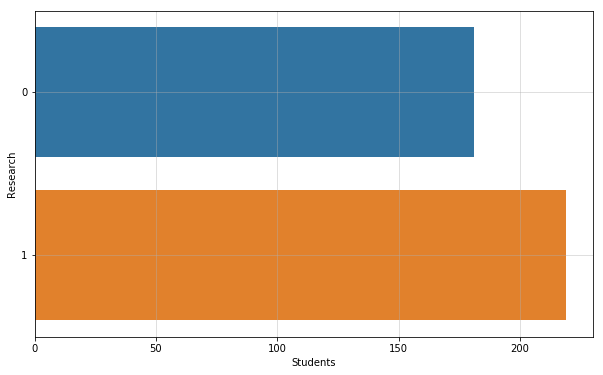

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['Research'])
plt.grid(alpha=0.5)
plt.xlabel('Students')
plt.show()

In [48]:
print("Total number of students with Research : ",(df['Research']==1).sum())
print("Total number of students with-out Research : ",len(df)-(df['Research']==1).sum())
print("Percentage of students with Research : ",round(((df['Research']==1).sum()/len(df))*100,2),'%')

Total number of students with Research :  219
Total number of students with-out Research :  181
Percentage of students with Research :  54.75 %


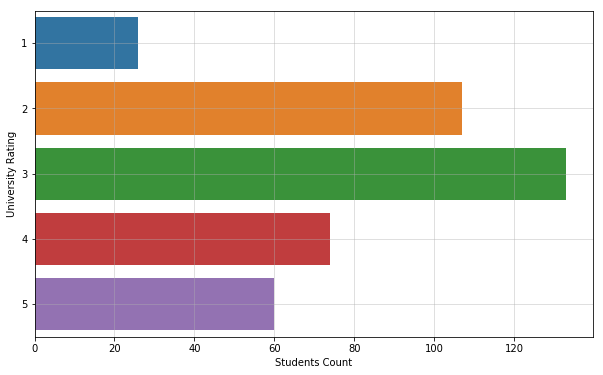

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['University Rating'])
plt.grid(alpha=0.5)
plt.xlabel('Students Count')
plt.show()

In [50]:
print('From given University Rating each university has a Student count of:')
print('University Rating 1 : ',(df['University Rating']==1).sum())
print('University Rating 2 : ',(df['University Rating']==2).sum())
print('University Rating 3 : ',(df['University Rating']==3).sum())
print('University Rating 4 : ',(df['University Rating']==4).sum())
print('University Rating 5 : ',(df['University Rating']==5).sum())

From given University Rating each university has a Student count of:
University Rating 1 :  26
University Rating 2 :  107
University Rating 3 :  133
University Rating 4 :  74
University Rating 5 :  60


In [51]:
gre_avg = df['GRE Score'].mean()
gre_std = df['GRE Score'].std()
print("Maximum GRE Score : 340")
print("Average GRE Score : ",gre_avg)
print("Standard Deaviation : ",gre_std)

diff = df['GRE Score']-gre_avg
df['SD_GRE'] = diff/gre_std

Maximum GRE Score : 340
Average GRE Score :  316.8075
Standard Deaviation :  11.473646113500477


In [52]:
toefl_avg = df['TOEFL Score'].mean()
toefl_std = df['TOEFL Score'].std()
print("Maximum TOEFL Score : 120")
print("Average TOEFL Score : ",toefl_avg)
print("Standard Deaviation : ",toefl_std)

diff = df['TOEFL Score']-toefl_avg
df['SD_TOEFL'] = diff/toefl_std

Maximum TOEFL Score : 120
Average TOEFL Score :  107.41
Standard Deaviation :  6.069513777374129


In [53]:
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit     SD_GRE  SD_TOEFL  
0         1              0.92  1.759903  1.744786  
1         1              0.76  0.626871 -0.067551  
2         1              0.72 -0.070379 -0.561824  
3         1              0.80  0.452559  0.426723  
4         0              0.65 -0.244691 -0.726582

In [59]:
x = df.drop(['Chance_of_Admit'], axis=1)
y = df['Chance_of_Admit']

In [60]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
dtypes: float64(3), int64(5)
memory usage: 25.1 KB


In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [63]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
coef = pd.DataFrame(lr.coef_, x_test.columns, columns = ['Co-efficient'])

In [65]:
coef


Co-efficient
Serial No.             0.000178
GRE Score              0.002108
TOEFL Score            0.003625
University Rating      0.008793
SOP                    0.002122
LOR                    0.017326
CGPA                   0.098666
Research               0.021478

In [66]:
y_pred_mlr = lr.predict(x_test)

In [67]:
len(x_test)

100

Text(0.5, 0.98, 'Actual vs Predicted')

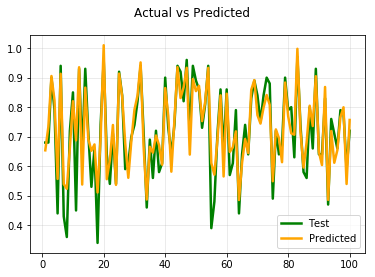

In [68]:
fig = plt.figure()
c = [i for i in range(1,101,1)]
plt.plot(c,y_test, color = 'green', linewidth = 2.5, label='Test')
plt.plot(c,y_pred_mlr, color = 'orange', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_mlr)
r_square_score = r2_score(y_test, y_pred_mlr)

In [70]:
print('Mean Square Error = ',mse)
print('R_Square Score = ',r_square_score)

Mean Square Error =  0.004215177997968436
R_Square Score =  0.8214375975975607


In [71]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [72]:
y_pred_dt = dt_model.predict(x_test)

In [73]:
from sklearn.metrics import r2_score
print('R_Squared Score = ',r2_score(y_test, y_pred_dt))

R_Squared Score =  0.66983236176613


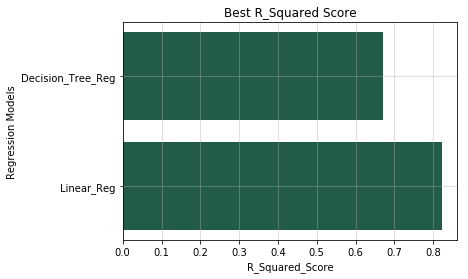

In [74]:
x = ["Linear_Reg","Decision_Tree_Reg"]
y = np.array([r2_score(y_test,y_pred_mlr),r2_score(y_test,y_pred_dt)])
plt.barh(x,y, color='#225b46')
plt.xlabel("R_Squared_Score")
plt.ylabel("Regression Models")
plt.title("Best R_Squared Score")
plt.grid(alpha=0.5)
plt.show()